In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


In [7]:
file_path = "/home/federica/LAB2/egfr_qsar/final_df1.csv" 
df = pd.read_csv(file_path)

In [8]:
def prepare_data(df):
    numerical_data = df.select_dtypes(include=[np.number])
    
    numerical_data = numerical_data.dropna(axis=1, how='any')
    return numerical_data

data = prepare_data(df)

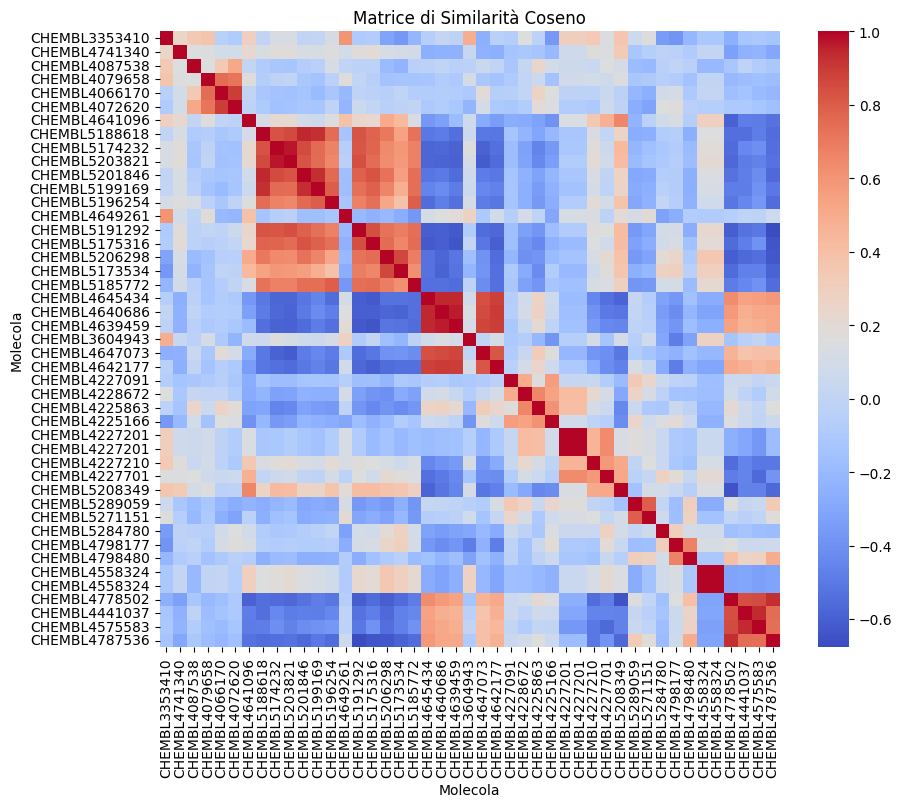

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
similarity_matrix = cosine_similarity(scaled_data)

# Funzione per visualizzare la matrice di similarità come heatmap
def plot_similarity_heatmap(similarity_matrix, molecule_ids):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, cmap='coolwarm', annot=False, fmt='.2f', xticklabels=molecule_ids, yticklabels=molecule_ids)
    plt.title('Matrice di Similarità Coseno')
    plt.xlabel('Molecola')
    plt.ylabel('Molecola')
    plt.show()

plot_similarity_heatmap(similarity_matrix, df['Molecule ChEMBL ID'])

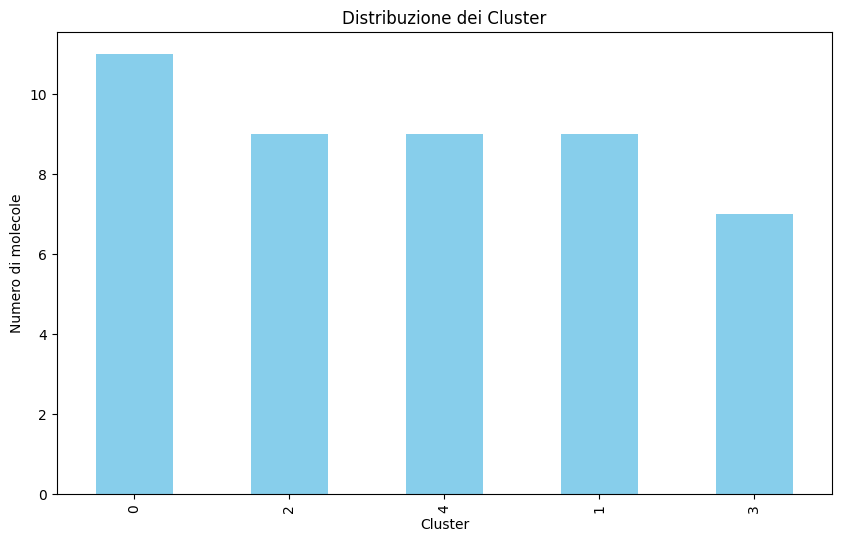

In [10]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(similarity_matrix)

plt.figure(figsize=(10, 6))
df['Cluster'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuzione dei Cluster')
plt.xlabel('Cluster')
plt.ylabel('Numero di molecole')
plt.show()

[0.36977927 0.47568076 0.56995715 0.64354264 0.6996189 ]


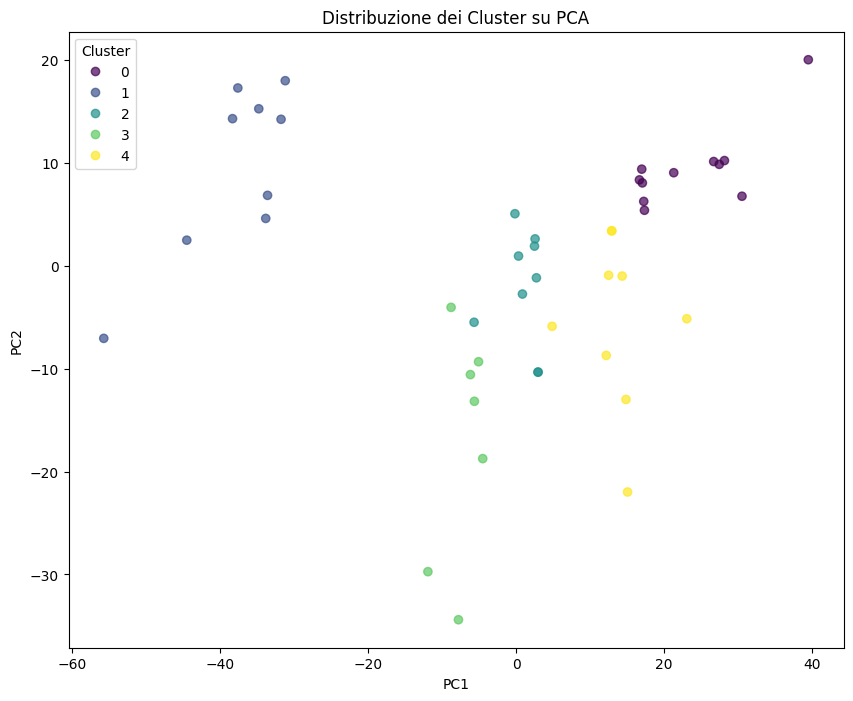

In [11]:

pca = PCA(n_components=5)  # Aumenta il numero di componenti principali
pca_results = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_

total_explained_variance = np.cumsum(explained_variance)
print(total_explained_variance) 


# Aggiungi i cluster ai risultati PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Distribuzione dei Cluster su PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


In [12]:
pca = PCA(n_components=2) 
pca_results = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
total_explained_variance = np.cumsum(explained_variance)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

def plot_results(pca_results, tsne_results, explained_variance, cluster_labels):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    cluster_colors = {0: 'blue', 1: 'green', 2: 'orange', 3: 'yellow', 4: 'red'}

    scatter_pca = axes[0].scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.7, 
                                  c=[cluster_colors[label] for label in cluster_labels], s=50)

    axes[0].set_title(f'PCA: Varianza Spiegata\nPC1={total_explained_variance[0]:.2%}, PC2={total_explained_variance[1]:.2%}')
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')

    scatter_tsne = axes[1].scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.7, 
                                   c=[cluster_colors[label] for label in cluster_labels], s=50)
    axes[1].set_title('t-SNE: Proiezione 2D')
    axes[1].set_xlabel('t-SNE 1')
    axes[1].set_ylabel('t-SNE 2')

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
               for color in cluster_colors.values()]
    labels = [f'Cluster {i}' for i in cluster_colors.keys()]

    axes[0].legend(handles, labels, title="Clusters", loc='upper left')
    axes[1].legend(handles, labels, title="Clusters", loc='upper right')

    plt.tight_layout()
    plt.show()


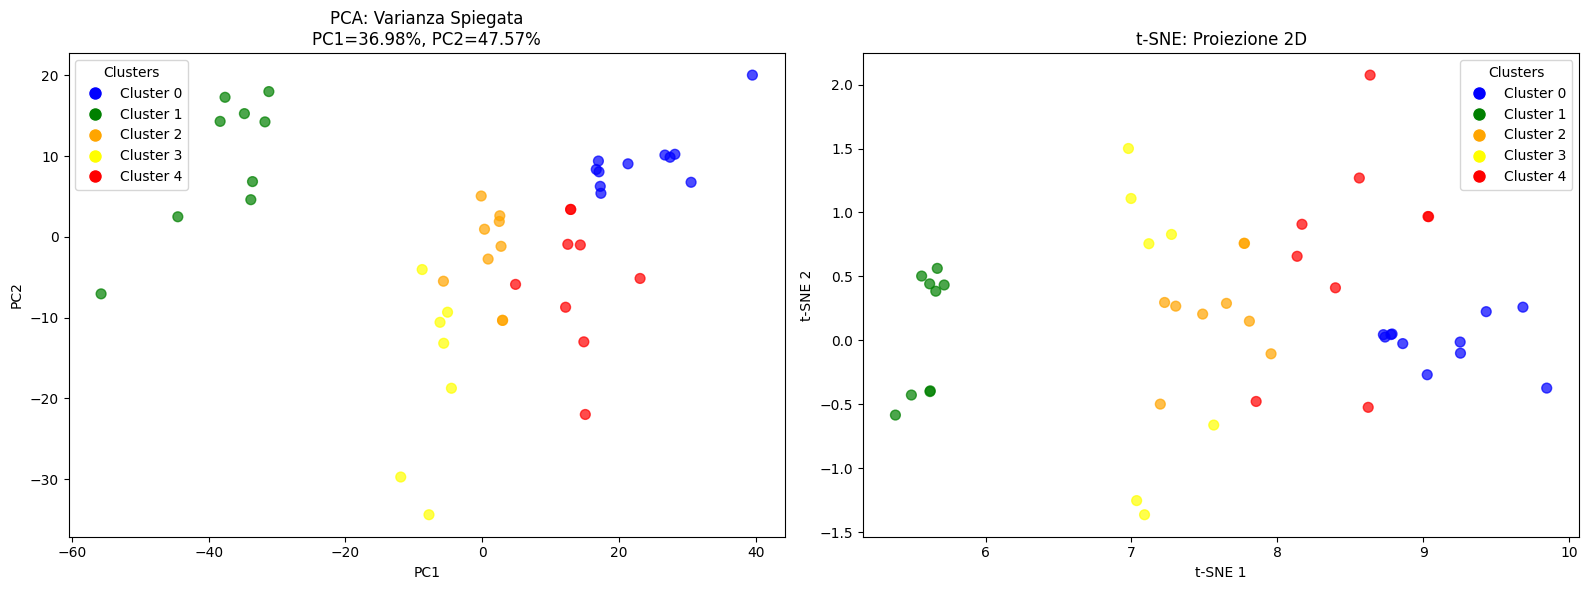

In [13]:
plot_results(pca_results, tsne_results, explained_variance, df['Cluster'])

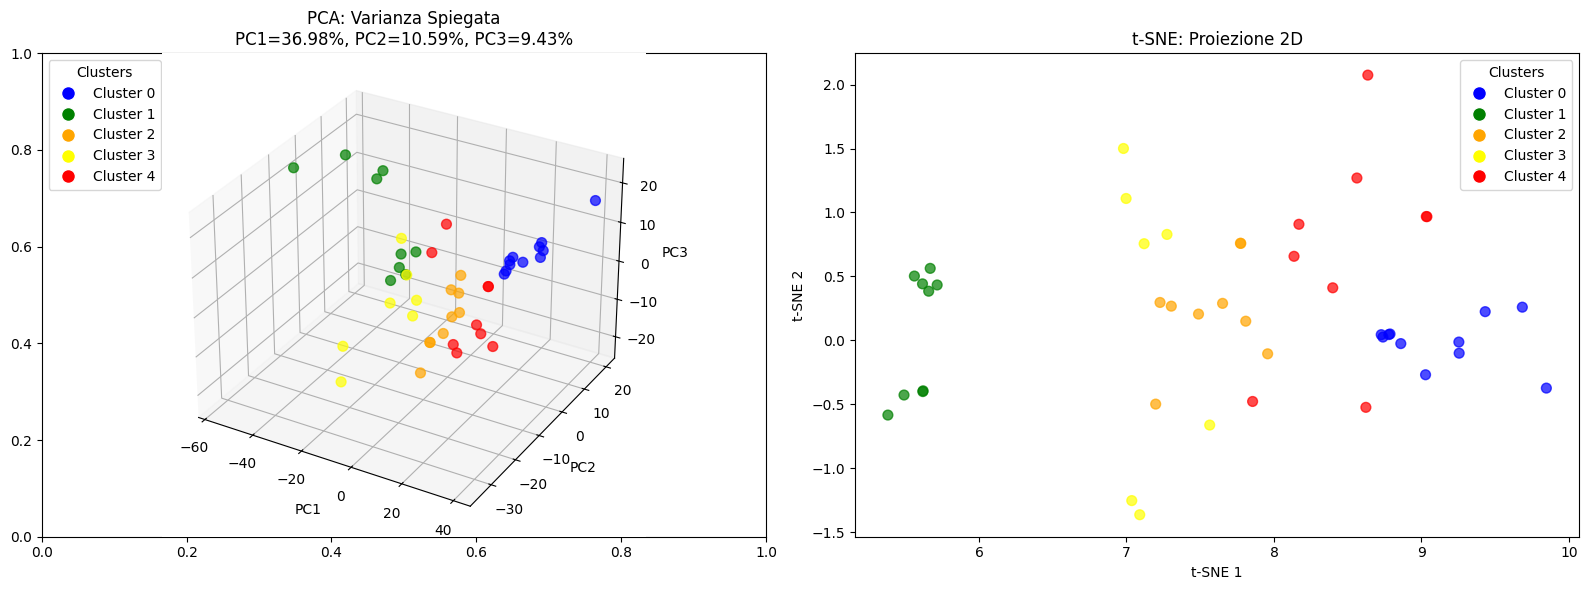

total_explained_variance: [0.36977927 0.47568076 0.56995715 0.64354264 0.6996189  0.74736229
 0.7845433  0.81377799 0.84152763 0.8671966 ]


In [14]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=10)
pca_results = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
total_explained_variance = np.cumsum(explained_variance)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

def plot_results(pca_results, tsne_results, explained_variance, cluster_labels):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    cluster_colors = {0: 'blue', 1: 'green', 2: 'orange', 3: 'yellow', 4: 'red'}

    ax_pca = fig.add_subplot(121, projection='3d')
    scatter_pca = ax_pca.scatter(pca_results[:, 0], pca_results[:, 1], pca_results[:, 2], alpha=0.7, 
                                 c=[cluster_colors[label] for label in cluster_labels], s=50)
    ax_pca.set_title(f'PCA: Varianza Spiegata\nPC1={explained_variance[0]:.2%}, PC2={explained_variance[1]:.2%}, PC3={explained_variance[2]:.2%}')
    ax_pca.set_xlabel('PC1')
    ax_pca.set_ylabel('PC2')
    ax_pca.set_zlabel('PC3')

    scatter_tsne = axes[1].scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.7, 
                                   c=[cluster_colors[label] for label in cluster_labels], s=50)
    axes[1].set_title('t-SNE: Proiezione 2D')
    axes[1].set_xlabel('t-SNE 1')
    axes[1].set_ylabel('t-SNE 2')

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
               for color in cluster_colors.values()]
    labels = [f'Cluster {i}' for i in cluster_colors.keys()]

    axes[0].legend(handles, labels, title="Clusters", loc='upper left')
    axes[1].legend(handles, labels, title="Clusters", loc='upper right')

    plt.tight_layout()
    plt.show()

plot_results(pca_results, tsne_results, explained_variance, df['Cluster'])
print(f"total_explained_variance: {total_explained_variance}")


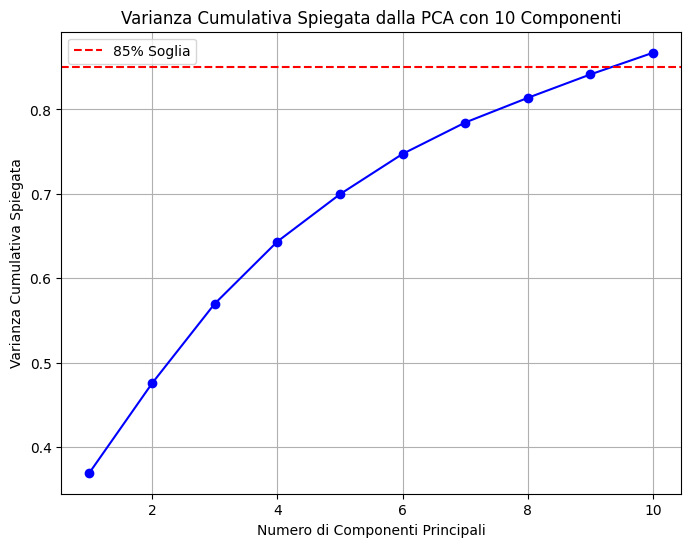

In [15]:
total_explained_variance = [0.36977927, 0.47568076, 0.56995715, 0.64354264, 0.6996189, 
                            0.74736229, 0.7845433, 0.81377799, 0.84152762, 0.86719658]

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 11), total_explained_variance, marker='o', color='b')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Cumulativa Spiegata')
plt.title('Varianza Cumulativa Spiegata dalla PCA con 10 Componenti')
plt.axhline(0.85, color='r', linestyle='--', label='85% Soglia')
plt.grid(True)
plt.legend()
plt.show()
